# Beispiel 18.2: Einfluss des gasseitigen Stoffübergangs auf Reaktionen 2. Ordnung 

Bearbeitet von Franz Braun

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 275 - 276. Die Nummerierung
der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Das hier angewendete
Vorgehen entspricht dem im Lehrbuch vorgestellten Lösungsweg.

Zunächst werden die benötigten Pakete importiert.

In [2]:
### Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

Anschließend werden die dimensionslosen Materialbilanzen (Gleichung 18.15a) und die dazugehörigen Randbedingungen (Tabelle 18.1) in eine Funktion implementiert.

In [3]:
def material(X,y):
    '''
    Dimensionslose Materialbilanz für die Reaktion 2.Ordnung (Gleichung 18.15a)
    y[0]       : Restanteil von A1
    y[1]       : Restanteil von A2
    y[2]       : Restanteil von A3
    y[3]       : erste Ableitung des Restanteils von A1 nach der dimensionslosen Ortskoordinate
    y[4]       : erste Ableitung des Restanteils von A2 nach der dimensionslosen Ortskoordinate
    y[5]       : erste Ableitung des Restanteils von A3 nach der dimensionslosen Ortskoordinate
    dy2dX2     : zweite Ableitung der Restanteile von nach der dimensionslosen Ortskoordinate (Vektor der Größe 3)
    nu         : Stöchiometrische Koeffizienten (Vektor der Größe 3)
    omega      : dimensionslose Reaktionsgeschwindigkeit
    X          : Ortskoordinate
    '''

    omega = omega_f(y[:3])
    
    dy2dX2 = np.empty_like(y[3:])
    
    dy2dX2[0] = - Ha**2 * nu[0] * omega
    dy2dX2[1] = - Ha**2 * nu[1] * omega
    dy2dX2[2] = - Ha**2 * nu[2] * omega
    

    return np.vstack((y[3:],dy2dX2))



def bc_material(y0,y1):
    '''
    Randbedingungen der Materialbilanz (Tabelle 18.1)
    y0 : Randbedingungen bei X = 0
    y1 : Randbedingungen bei X = 1
    '''
    BC = np.empty(nu.size *2)
    # A1
    BC[0] = y0[3] - Bi * (y0[0] - f_e[0]) # df_1,L = Bi_i,m * (f_i,L - f_1,G,b)
    BC[1] = y1[0]                         # f_1,L = 0 
    # A2
    BC[2] = y0[4]                         # df_2,L/dX = 0
    BC[3] = y1[1] - f_e[1]                # f_2,L = f_2,L,b
    # A3
    BC[4] = y0[5]                         # df_3,L/dX = 0
    BC[5] = y1[2] - f_e[2]                # f_3,L = f_3,L,b
    
    return BC

Danach werden die stöchiometrischen Koeffizienten gemäß der Reaktionsgleichung (18.1) und die Hatta-Zahl parametriert. Die dimensionslose Reaktionsgeschwindigkeit 2. Ordnung ergibt sich aus Gleichung (18.12e) für eine einzelne Reaktion wie folgt:

\begin{align*}
    \omega_\mathrm{L} &= \frac{r_\mathrm{1,L}}{r_\mathrm{1,e}} = \frac{k_1\,c_\mathrm{1,L}}{k_1\,c_\mathrm{1,e,L}}\frac{c_\mathrm{2,L}}{c_\mathrm{2,e,L}}
\end{align*}

Durch Umformung erhalt man einen Ausdruck auf Basis des Restanteils und des Einsatzverhältnisses.

\begin{align*}
    \omega_\mathrm{L}
    &=\frac{c_\mathrm{1,L}}{c_\mathrm{1,e,L}}\frac{c_\mathrm{2,L}}{c_\mathrm{2,e,L}}\frac{c_\mathrm{1,e,L}}{c_\mathrm{1,e,L}}  
    = \frac{c_\mathrm{1,L}}{c_\mathrm{1,e,L}}\frac{c_\mathrm{2,L}}{c_\mathrm{1,e,L}}\frac{c_\mathrm{1,e,L}}{c_\mathrm{2,e,L}}\\
    &=f_1\,f_2\,\kappa_{2}^{-1}
\end{align*}

Diese Gleichung für die dimensionslose Reaktionsgeschwindigkeit wird in eine Funktion implementiert.

In [4]:
nu      = np.array((-1,-1,1)) # Stöchiometrische Koeffizienten für A1, A2, A3 
f_e     = np.array((1,2,0))   # Restanteile am Eintritt
Ha      = 2                   # Hatta - Zahl
kappa_2 = 1                   # Einsatzverhältnis

def omega_f(f):
    '''
    Dimensionslose Reaktionsgeschwindigkeit für eine Reaktion 2. Ordnung
    f : Vektor der Restanteile 
    '''
    return f[0] * f[1] / kappa_2

Da der Einfluss der Biot-Zahl $(Bi)$ betrachtet werden soll, erfolgt die Variation von $Bi$ in einer For-Schleife.

In [5]:
Bi_vec   = np.array((1,10,100,1000))        # Vektor mit Biot - Zahlen für Beispiel 18.3

Lösungen = []                               # Leere Liste zum Speichern der Lösungen
N        = 101                              # Diskretisierung
X        = np.linspace(0,1,N)               # Diskretisierung der Ortskoordinate
init_f   = np.ones((3,N))                   # Startwerte für Restanteile
init_df  = np.ones((3,N))*1e-5              # Startwerte für die Ableitungen der Restanteile
init     = np.vstack((init_f,init_df))      # Zusammengefügte Startwerte für die Iterationen des Solvers

for BiBi in Bi_vec:
    Bi = BiBi
    sol = solve_bvp(material, bc_material, X,init , max_nodes = 1e10, tol = 1e-10)
    if sol.success == False:
        print(sol)
    Lösungen.append(sol)

Lösungen_3 = np.array((Lösungen))

Abschließend werden die Ergebnisse grafisch dargestellt.

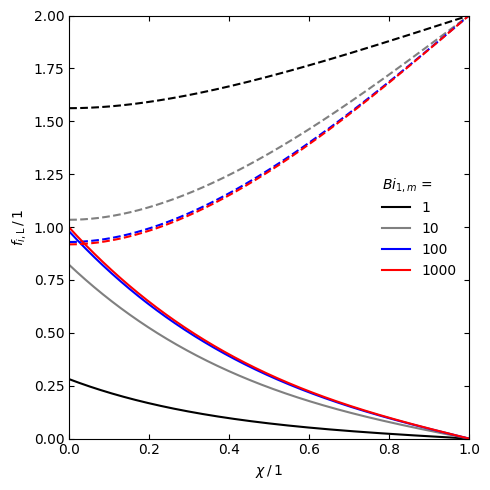

In [7]:
colors = ['black','gray','blue','red']

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
for Lösung, Bi, color in zip(Lösungen_3,Bi_vec,colors):
    ax.plot(Lösung.x, Lösung.y[0], label = str(Bi), color = color)
    ax.plot(Lösung.x, Lösung.y[1], color = color, linestyle = '--')

ax.set_xlim(0,1)
ax.set_ylim(0,2)
ax.tick_params(axis="y",direction="in", right = True)
ax.tick_params(axis="x",direction="in", top = True)
ax.set_ylabel(r'$f_{i,\mathrm{L}}\,/\,1$')
ax.set_xlabel(r'$\chi \,/\,1$')
ax.legend(title = '$Bi_\mathrm{1,m}$ =',frameon = False, alignment = 'left')

plt.tight_layout()
plt.show()